# **Lojistik Regresyon**
## **Diyabet Teşhisi**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/kandij/diabetes-dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


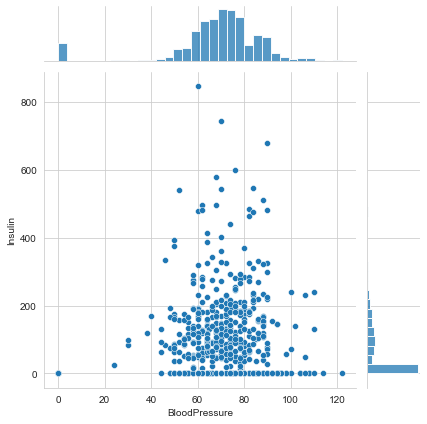

In [5]:
sns.set_style('whitegrid')
grid = sns.JointGrid(x="BloodPressure", y="Insulin", data =df );
grid.plot(sns.scatterplot, sns.histplot)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

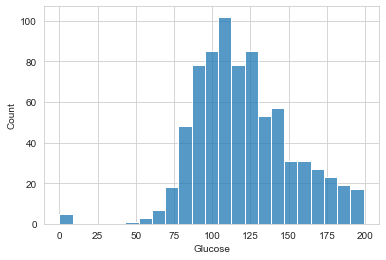

In [6]:
sns.histplot(x="Glucose", data=df)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

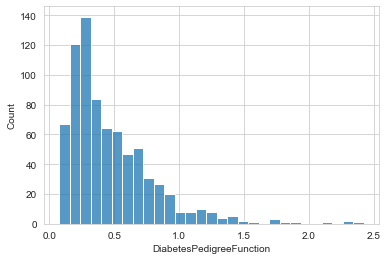

In [7]:
sns.histplot(x="DiabetesPedigreeFunction", data=df)

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

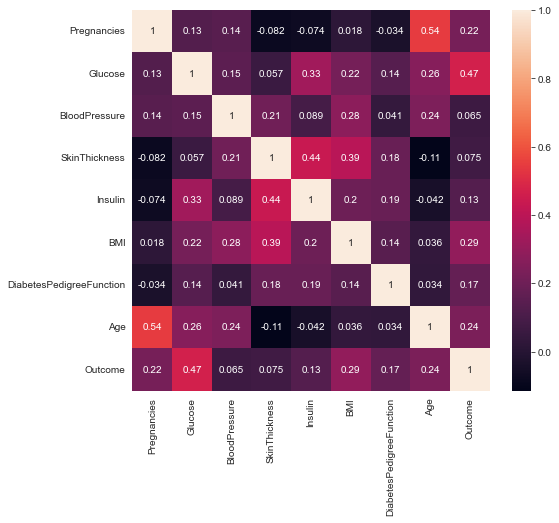

In [9]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

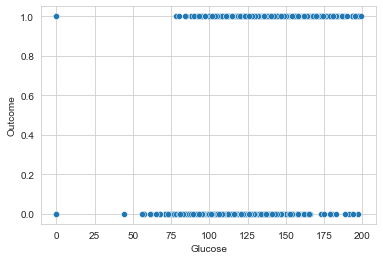

In [10]:
sns.scatterplot(x="Glucose", y="Outcome", data=df)

---
## Train Test Split

In [11]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=9)

In [14]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

---
## Model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log = LogisticRegression()
log.fit(scaled_X_train, y_train)

LogisticRegression()

In [17]:
log.coef_

array([[ 0.45163262,  1.20803333, -0.24414583, -0.03153419, -0.15468976,
         0.71791756,  0.41357585,  0.19031196]])

In [18]:
coef = pd.Series(index=X.columns, data=log.coef_[0])
coef.sort_values(inplace=True)

<AxesSubplot:>

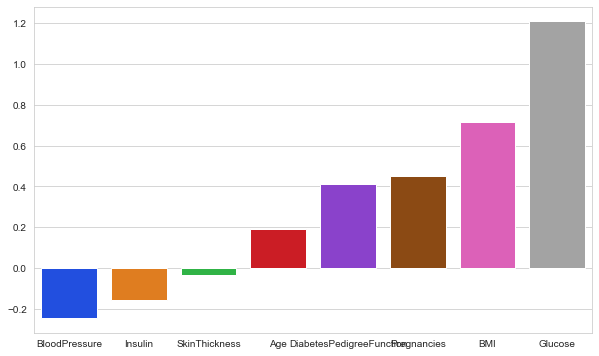

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=coef.index, y=coef.values, palette="bright")

---
## Performans Değerlendirme

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [21]:
hasta_pred = log.predict(scaled_X_test)

In [22]:
accuracy_score(y_test, hasta_pred)

0.7467532467532467

In [23]:
cm = confusion_matrix(y_test, hasta_pred)

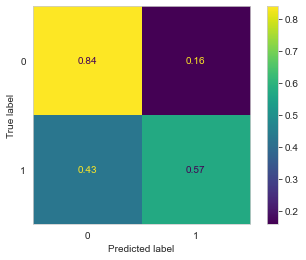

In [24]:
ConfusionMatrixDisplay.from_estimator(log, scaled_X_test, y_test, normalize="true")
plt.grid(False)

In [25]:
print(classification_report(y_test, hasta_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



---
### Değerlendirme Eğrisi ve AUC

In [27]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

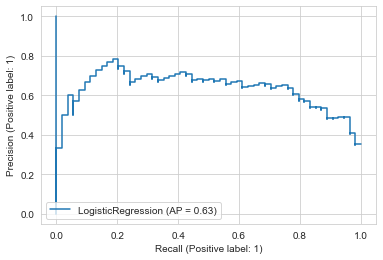

In [28]:
PrecisionRecallDisplay.from_estimator(log, scaled_X_test, y_test);

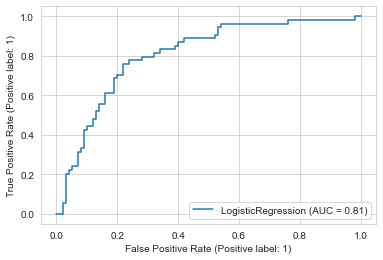

In [29]:
RocCurveDisplay.from_estimator(log, scaled_X_test, y_test)

---

# **https://www.youtube.com/watch?v=KIjSIA-mB5o**